In [27]:
# Import dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [28]:
# Read CSV files
denver_file = "Resources/Denver_Final.csv"
denver_df = pd.read_csv(denver_file, encoding= "unicode_escape")


In [29]:
# Evaluate data, drop na
denver_df.head()
denver_df = denver_df.dropna()
denver_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115023 entries, 0 to 115022
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Reported Date  115023 non-null  object
 1   Year           115023 non-null  int64 
 2   Month          115023 non-null  object
 3   City           115023 non-null  object
 4   Offense        115023 non-null  object
 5   Is Violent     115023 non-null  object
dtypes: int64(1), object(5)
memory usage: 6.1+ MB


In [30]:
# Convert reported data to pandas datetime64 type and use DatetimeIndex to add year and month data
# NOTE:  First convert date from an object to datetime64 use info() method to confirm panda data type for Reporte Dates
denver_df["Reported Date"] = pd.to_datetime(denver_df["Reported Date"])
denver_df["Year"] = pd.DatetimeIndex(denver_df["Reported Date"]).year
denver_df["Month"] = pd.DatetimeIndex(denver_df["Reported Date"]).month
denver_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 115023 entries, 0 to 115022
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Reported Date  115023 non-null  datetime64[ns]
 1   Year           115023 non-null  int64         
 2   Month          115023 non-null  int64         
 3   City           115023 non-null  object        
 4   Offense        115023 non-null  object        
 5   Is Violent     115023 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 6.1+ MB


In [31]:
# Review offense types and clean data (remove traffic violations)
denver_df["Offense"].value_counts()
dclean_df = denver_df.loc[denver_df["Offense"] != "traffic-accident"]
dclean_df["Offense"].value_counts()
dclean_df.head()

,Reported Date,Year,Month,City,Offense,Is Violent
0,2020-06-30,2020,6,Denver,all-other-crimes,Non-Violent
1,2020-06-30,2020,6,Denver,all-other-crimes,Non-Violent
2,2020-06-30,2020,6,Denver,arson,Non-Violent
3,2020-06-30,2020,6,Denver,all-other-crimes,Non-Violent
4,2020-06-30,2020,6,Denver,drug-alcohol,Non-Violent


In [32]:
# Group data by offense type and organize 
doffense_df = dclean_df.groupby("Offense").count()
doffense_df = doffense_df.sort_values("Reported Date", ascending=False)
doffense_df.head(10)


,Reported Date,Year,Month,City,Is Violent
Offense,,,,,
all-other-crimes,18729,18729,18729,18729,18729
larceny,13102,13102,13102,13102,13102
public-disorder,11966,11966,11966,11966,11966
theft-from-motor-vehicle,11254,11254,11254,11254,11254
auto-theft,7630,7630,7630,7630,7630
other-crimes-against-persons,5962,5962,5962,5962,5962
burglary,5916,5916,5916,5916,5916
drug-alcohol,5675,5675,5675,5675,5675
aggravated-assault,3502,3502,3502,3502,3502


In [33]:
# Create sunnnary tabel of Denver Crime Statistics
dcrime_summary_df = dclean_df.groupby("Offense").count()
dcrime_summary_df = dcrime_summary_df.sort_values(by=["Is Violent"], ascending=False)
dcrime_summary_df = dcrime_summary_df["Is Violent"]

pd.DataFrame({"# Reported Offenses": dcrime_summary_df})


,# Reported Offenses
Offense,
all-other-crimes,18729
larceny,13102
public-disorder,11966
theft-from-motor-vehicle,11254
auto-theft,7630
other-crimes-against-persons,5962
burglary,5916
drug-alcohol,5675
aggravated-assault,3502


In [34]:
# Pie chart data

# Violent vs. Non_Violent Crime
violent_crimes = dclean_df["Is Violent"].loc[dclean_df["Is Violent"] == "Violent"].count()
non_violent_crimes = dclean_df["Is Violent"].loc[dclean_df["Is Violent"] == "Non-Violent"].count()

# Top 10 Denver Crime dataframes
AllOther_df = dclean_df.loc[dclean_df["Offense"] == "all-other-crimes"]
Larceny_df = dclean_df.loc[dclean_df["Offense"] == "larceny"]
PubDisorder_df = dclean_df.loc[dclean_df["Offense"] == "public-disorder"]
TheftfromMV_df = dclean_df.loc[dclean_df["Offense"] == "theft-from-motor-vehicle"]
Auto_df = dclean_df.loc[dclean_df["Offense"] == "auto-theft"]
Other_df = dclean_df.loc[dclean_df["Offense"] == "other-crimes-against-persons"]
Burg_df = dclean_df.loc[dclean_df["Offense"] == "burglary"]
Drug_df = dclean_df.loc[dclean_df["Offense"] == "drug-alcohol"]
AggAssault_df = dclean_df.loc[dclean_df["Offense"] == "aggravated-assault"]
WhiteCol_df = dclean_df.loc[dclean_df["Offense"] == "white-collar-crime"]

# Top 10 Crime data for pie chart
Total = dclean_df["Offense"].count()
AllOther = AllOther_df["Offense"].count()
Larceny = Larceny_df["Offense"].count()
PubDisorder = PubDisorder_df["Offense"].count()
TheftfromMV = TheftfromMV_df["Offense"].count()
Auto = Auto_df["Offense"].count()
Other = Other_df["Offense"].count()
Burg = Burg_df["Offense"].count()
Drug = Drug_df["Offense"].count()
AggAssault = AggAssault_df["Offense"].count()
WhiteCol = WhiteCol_df["Offense"].count()
OtherOther = (Total - AllOther - Larceny - PubDisorder - TheftfromMV - Auto - Other - Burg - 
              Drug - AggAssault - WhiteCol)

print(non_violent_crimes, violent_crimes)
print(AllOther, Larceny, PubDisorder, TheftfromMV, Auto, Other, Burg, Drug, AggAssault, WhiteCol)


OtherOther
Total


77680 10657
18729 13102 11966 11254 7630 5962 5916 5675 3502 1745


88337

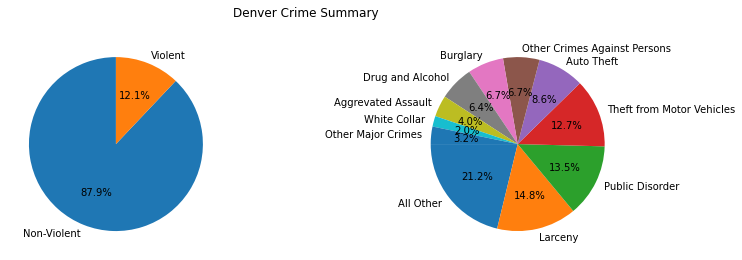

In [35]:
# Plot pie chart of crime types

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plt.suptitle("Denver Crime Summary")

# First Plot
values1 = [non_violent_crimes, violent_crimes]
labels1 = ["Non-Violent", "Violent"]
ax1.pie(values1, labels=labels1, autopct="%1.1f%%", shadow=False, startangle=90)

# Second Plot
values2 = [AllOther, Larceny, PubDisorder, TheftfromMV, Auto, Other, Burg, Drug, AggAssault, WhiteCol, OtherOther]
labels2 = ["All Other", "Larceny", "Public Disorder", "Theft from Motor Vehicles", "Auto Theft", 
           "Other Crimes Against Persons", "Burglary", "Drug and Alcohol", "Aggrevated Assault", "White Collar", 
           "Other Major Crimes"]
ax2.pie(values2, labels=labels2, autopct="%1.1f%%", shadow=False, startangle=180)

# Plot
plt.subplots_adjust(wspace=.5)
plt.savefig("Output Folder/denverpie.png", dpi=300)   
plt.show()


In [36]:
# Group data into Violent / Non-violent categories, trends by month 
dtrend_df = dclean_df.groupby(["Is Violent", "Year", "Month"]).count()
# dtrend_df = dtrend_df.sort_values(by=["Year", "Month"], ascending=True)dddd
dtrend_df.head()


Reported Date  City  Offense
Is Violent  Year Month                              
Non-Violent 2019 3               4597  4597     4597
                 4               4701  4701     4701
                 5               4875  4875     4875
                 6               5016  5016     5016
                 7               5403  5403     5403

In [37]:
# Break trend data into violent and non-violent data frames and sort by Year and Month
# Nonviolent data
nonviolent_df = dtrend_df.loc["Non-Violent"]
nonviolent_df = nonviolent_df.sort_values(by=["Year", "Month"], ascending=True)

# Violent data
violent_df = dtrend_df.loc["Violent"]
violent_df = violent_df.sort_values(by=["Year", "Month"], ascending=True)


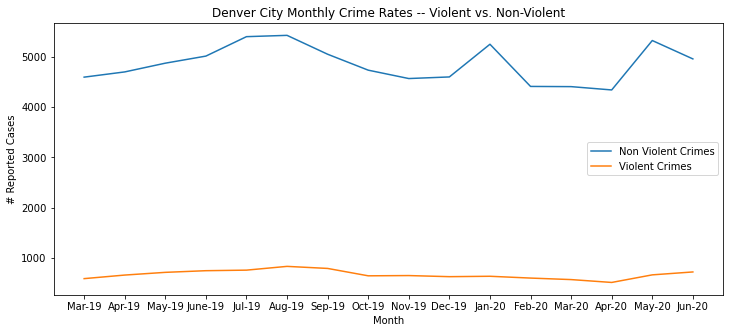

In [38]:
# Generate line plot as figure
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("Denver City Monthly Crime Rates -- Violent vs. Non-Violent")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(nonviolent_df["Offense"]), label="Non Violent Crimes")
plt.plot(list(violent_df["Offense"]), label="Violent Crimes")
plt.legend(loc="center right")
plt.savefig("Output Folder/dentrend.png", dpi=300) 
plt.show()


In [39]:
# Summary look at Violent crimes:
DVioSum_df = dclean_df.loc[denver_df["Is Violent"] == "Violent"]
#DVioSum_df.groupby("Offense").count()
DVioSum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10657 entries, 20 to 115021
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Reported Date  10657 non-null  datetime64[ns]
 1   Year           10657 non-null  int64         
 2   Month          10657 non-null  int64         
 3   City           10657 non-null  object        
 4   Offense        10657 non-null  object        
 5   Is Violent     10657 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 582.8+ KB


In [40]:
# Violent crime trends
VTrend_df = DVioSum_df.groupby(["Offense", "Year", "Month"]).count()
VTrend_df.head()

Reported Date  City  Is Violent
Offense            Year Month                                 
aggravated-assault 2019 3                152   152         152
                        4                191   191         191
                        5                190   190         190
                        6                252   252         252
                        7                249   249         249

In [41]:
# Create violent crime plot data
AggAssault_df = VTrend_df.loc["aggravated-assault"]
SexAssault_df = VTrend_df.loc["sexual-assault"]
OtherAssault_df = VTrend_df.loc["other-crimes-against-persons"]
Murder_df = VTrend_df.loc["murder"]

AggAssault = AggAssault_df["Is Violent"]
SexAssault = SexAssault_df["Is Violent"]
OtherAssault = OtherAssault_df["Is Violent"]
Murder = Murder_df["Is Violent"]


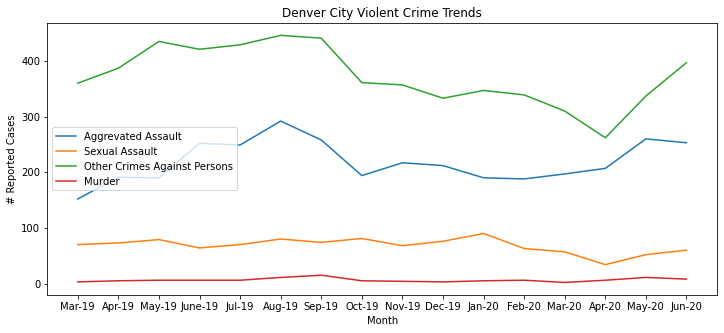

In [42]:
# Plot violent crime trends
# Step 1: Configure chart, xticks, and labels/titles
plt.figure(figsize=(12, 5))
plt.xticks(np.arange(16), ["Mar-19", "Apr-19", "May-19", "June-19", "Jul-19", "Aug-19", "Sep-19", "Oct-19", 
                      "Nov-19", "Dec-19", "Jan-20", "Feb-20", "Mar-20", "Apr-20", "May-20", "Jun-20"])
plt.title("Denver City Violent Crime Trends")
plt.xlabel("Month")
plt.ylabel("# Reported Cases")

# Step 2:  Configure data and plot
plt.plot(list(AggAssault), label="Aggrevated Assault")
plt.plot(list(SexAssault), label="Sexual Assault")
plt.plot(list(OtherAssault), label="Other Crimes Against Persons")
plt.plot(list(Murder), label="Murder")
plt.legend(loc="center left")
plt.savefig("Output Folder/denviolent.png", dpi=300) 
plt.show()